### Importação dos dados



In [42]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


# Conhecendo a base

In [43]:
#olhar linhas e colunas em cada base
print(loja.shape)
print(loja2.shape)
print(loja3.shape)
print(loja4.shape)

(2359, 12)
(2359, 12)
(2359, 12)
(2358, 12)


In [44]:
#criar uma coluna em cada base para saber a origem
loja['origem'] = 'loja1'
loja2['origem'] = 'loja2'
loja3 ['origem']= 'loja3 '
loja4 ['origem']= 'loja4'

In [45]:
#olhar linhas e colunas em cada base após incluir origem
print(loja.shape)
print(loja2.shape)
print(loja3.shape)
print(loja4.shape)

(2359, 13)
(2359, 13)
(2359, 13)
(2358, 13)


In [46]:
#juntar as bases
lojas = pd.concat([loja,loja2,loja3,loja4])
lojas.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,origem
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,loja1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,loja1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,loja1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,loja1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,loja1


In [47]:
#validar qtd linhas e colunas.
print(lojas.shape)

(9435, 13)


#1. Análise do faturamento


In [48]:
# Calculando o faturamento total agrupando por loja
faturamento_total_loja = lojas.groupby('origem')['Preço'].sum().reset_index()

# Ordenar do maior para o menor
faturamento_total_loja = faturamento_total_loja.sort_values(by='Preço', ascending=False)

faturamento_total_loja

,origem,Preço
0,loja1,1534509.12
1,loja2,1488459.06
2,loja3,1464025.03
3,loja4,1384497.58


In [49]:
print(lojas['Data da Compra'].dtype)


object


In [50]:
# Convertendo a coluna de data para formato datetime
lojas['Data da Compra'] = pd.to_datetime(lojas['Data da Compra'])

# Criando uma coluna que contém apenas o mês e ano
lojas['Ano_Mes'] = lojas['Data da Compra'].dt.to_period('M')

# Criando uma coluna que contém apenas o ano
lojas['Ano'] = lojas['Data da Compra'].dt.year


/tmp/ipython-input-50-794855363.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  lojas['Data da Compra'] = pd.to_datetime(lojas['Data da Compra'])


In [51]:
# Agrupando por mês e calculando o faturamento médio
faturamento_medio_por_ano = lojas.groupby(['Ano','origem'], as_index=False)['Preço'].mean()

faturamento_medio_por_ano


,Ano,origem,Preço
0,2020,loja1,687.988126
1,2020,loja2,610.411786
2,2020,loja3,611.901698
3,2020,loja4,592.120161
4,2021,loja1,653.355765
5,2021,loja2,616.981410
6,2021,loja3,653.971500
7,2021,loja4,623.337728
8,2022,loja1,591.986311
9,2022,loja2,674.626497


# 2. Vendas por Categoria


In [52]:
#validando a quantidade de categorias.
print(lojas["Categoria do Produto"].nunique())

8


In [53]:
# Contando a quantidade de vendas por categoria
qtd_vendas_categoria = lojas.groupby('Categoria do Produto', as_index=False).size().rename(columns={'size': 'Quantidade de Vendas'})

# Ordenar do maior para o menor
qtd_vendas_categoria = qtd_vendas_categoria.sort_values(by='Quantidade de Vendas', ascending=False)

qtd_vendas_categoria

,Categoria do Produto,Quantidade de Vendas
6,moveis,1886
2,eletronicos,1772
0,brinquedos,1290
1,eletrodomesticos,1149
3,esporte e lazer,1113
4,instrumentos musicais,753
5,livros,742
7,utilidades domesticas,730


In [54]:
#contando quantos nomes de categoria de produtos distintos existem.
print(lojas["Produto"].nunique())

51


In [55]:
# Contando a quantidade de vendas por produtos
qtd_vendas_produto = lojas.groupby('Produto', as_index=False).size().rename(columns={'size': 'Quantidade de Vendas'})

# Ordenar do maior para o menor
qtd_vendas_produto = qtd_vendas_produto.sort_values(by='Quantidade de Vendas', ascending=False)

#trazer só top10 ao inves do 51 produtos
qtd_vendas_produto.head(10)

,Produto,Quantidade de Vendas
17,Cômoda,210
10,Carrinho controle remoto,206
37,Micro-ondas,206
1,Bateria,203
9,Cama king,201
30,Jogo de panelas,200
39,Modelagem preditiva,200
43,Secadora de roupas,200
3,Blocos de montar,199
8,Cama box,199


In [56]:
# Contando a quantidade de vendas por categoria, produto
qtd_vendas_categoria_loja = lojas.groupby(['origem', 'Categoria do Produto'], as_index=False).size().rename(columns={'size': 'Quantidade de Vendas'})

# Ordenando do maior para o menor número de vendas
qtd_vendas_categoria_loja = qtd_vendas_categoria_loja.sort_values(by=['origem', 'Quantidade de Vendas'], ascending=[True, False])

# Pegando apenas a primeira linha de cada loja (categoria mais vendida)
categoria_mais_vendida_por_loja = qtd_vendas_categoria_loja.groupby('origem').head(1)

categoria_mais_vendida_por_loja

,origem,Categoria do Produto,Quantidade de Vendas
6,loja1,moveis,465
14,loja2,moveis,442
22,loja3,moveis,499
30,loja4,moveis,480


In [57]:
# Filtrar apenas as categorias mais vendidas por loja
lojas_filtrado = lojas.merge(categoria_mais_vendida_por_loja[['origem', 'Categoria do Produto']], on=['origem', 'Categoria do Produto'])

# Contando a quantidade de vendas por produto dentro da categoria mais vendida
qtd_vendas_categoria_produto_loja = lojas_filtrado.groupby(['origem', 'Categoria do Produto', 'Produto'], as_index=False).size().rename(columns={'size': 'Quantidade de Vendas'})

# Ordenando do maior para o menor número de vendas
qtd_vendas_categoria_produto_loja = qtd_vendas_categoria_produto_loja.sort_values(by=['origem', 'Categoria do Produto', 'Quantidade de Vendas'], ascending=[True, True, False])

# Selecionar apenas o produto mais vendido dentro da categoria mais popular em cada loja
produto_mais_vendido_por_categoria_loja = qtd_vendas_categoria_produto_loja.groupby(['origem', 'Categoria do Produto']).head(1)

produto_mais_vendido_por_categoria_loja



,origem,Categoria do Produto,Produto,Quantidade de Vendas
4,loja1,moveis,Guarda roupas,60
14,loja2,moveis,Guarda roupas,54
25,loja3,moveis,Kit banquetas,57
31,loja4,moveis,Cama box,62


# 3. Média de Avaliação das Lojas

In [58]:
# Calculando a média da avaliação por loja
media_avaliacao_lojas = lojas.groupby('origem', as_index=False)['Avaliação da compra'].mean()

#ordenado do maior para menor avaliação
media_avaliacao_lojas = media_avaliacao_lojas.sort_values(by='Avaliação da compra', ascending=False)

media_avaliacao_lojas

,origem,Avaliação da compra
2,loja3,4.048326
1,loja2,4.037304
3,loja4,3.995759
0,loja1,3.976685


# 4. Produtos Mais e Menos Vendidos

In [59]:
# Contando a quantidade produto mais vendidos
top_mais_vendidos = lojas.groupby(['origem', 'Produto'], as_index=False).size().rename(columns={'size': 'Quantidade de Vendas'})

# Ordenando do maior para o menor
top_mais_vendidos = top_mais_vendidos.sort_values(by=['origem', 'Quantidade de Vendas'], ascending=[True, False])

# Pegando apenas a primeira linha de cada loja (produto mais vendida por loja)
top_mais_vendidos= top_mais_vendidos.groupby('origem').head(1)

top_mais_vendidos

,origem,Produto,Quantidade de Vendas
24,loja1,Guarda roupas,60
79,loja2,Iniciando em programação,65
134,loja3,Kit banquetas,57
161,loja4,Cama box,62


In [80]:
# Agrupando por Produto e Loja para calcular o total de vendas
total_vendas_produtos = lojas.groupby(['origem', 'Produto'], as_index=False)['Preço'].sum()

# Contando a quantidade de vendas por Produto e Loja
quantidade_vendas = lojas.groupby(['origem', 'Produto'], as_index=False).size().rename(columns={'size': 'Quantidade de Vendas'})

# Mesclando as duas tabelas
vendas_por_produto_loja = total_vendas_produtos.merge(quantidade_vendas, on=['origem', 'Produto'])

# Ordenando do maior valor para o menor valor vendido
vendas_por_produto_loja = vendas_por_produto_loja.sort_values(by='Preço', ascending=False).head(10)

# Exibindo o resultado
vendas_por_produto_loja

,origem,Produto,Preço,Quantidade de Vendas
47,loja1,TV Led UHD 4K,189534.28,60
63,loja2,Celular Plus X42,150967.83,55
23,loja1,Geladeira,149524.28,54
98,loja2,TV Led UHD 4K,137833.06,45
125,loja3,Geladeira,133185.99,50
12,loja1,Celular Plus X42,130536.40,49
74,loja2,Geladeira,130176.48,49
165,loja4,Celular Plus X42,128930.07,48
149,loja3,TV Led UHD 4K,128892.11,42
114,loja3,Celular Plus X42,124300.84,46


In [60]:
# Contando a quantidade produto menos vendidos
top_menos_vendidos = lojas.groupby(['origem', 'Produto'], as_index=False).size().rename(columns={'size': 'Quantidade de Vendas'})

# Ordenando do menor para o maior
top_menos_vendidos = top_menos_vendidos.sort_values(by=['origem', 'Quantidade de Vendas'], ascending=[True, True])

# Pegando apenas a primeira linha de cada loja (produto menos vendido por loja)
top_menos_vendidos= top_menos_vendidos.groupby('origem').head(1)

top_menos_vendidos

,origem,Produto,Quantidade de Vendas
11,loja1,Celular ABXY,33
82,loja2,Jogo de tabuleiro,32
105,loja3,Blocos de montar,35
178,loja4,Guitarra,33


In [83]:
# Ordenando do menos vendido para o mais vendido
vendas_por_produto_loja = vendas_por_produto_loja.sort_values(by='Preço', ascending=True).head(10)

# Exibindo o resultado
vendas_por_produto_loja

,origem,Produto,Preço,Quantidade de Vendas
114,loja3,Celular Plus X42,124300.84,46
149,loja3,TV Led UHD 4K,128892.11,42
165,loja4,Celular Plus X42,128930.07,48
74,loja2,Geladeira,130176.48,49
12,loja1,Celular Plus X42,130536.40,49
125,loja3,Geladeira,133185.99,50
98,loja2,TV Led UHD 4K,137833.06,45
23,loja1,Geladeira,149524.28,54
63,loja2,Celular Plus X42,150967.83,55
47,loja1,TV Led UHD 4K,189534.28,60


# 5. Frete Médio por Loja


In [61]:
# Calculando a média da avaliação por loja
media_frete_lojas = lojas.groupby('origem', as_index=False)['Frete'].mean()

#ordenado do maior para menor avaliação
media_frete_lojas = media_frete_lojas.sort_values(by='Frete', ascending=False)

media_frete_lojas

,origem,Frete
0,loja1,34.691805
1,loja2,33.621941
2,loja3,33.074464
3,loja4,31.278997


In [62]:
# Calculando o faturamento medio agrupando por loja
faturamento_medio_loja = lojas.groupby('origem')['Preço'].mean().reset_index()

# Ordenar do maior para o menor
faturamento_medio_loja = faturamento_medio_loja.sort_values(by='Preço', ascending=False)

faturamento_medio_loja

,origem,Preço
0,loja1,650.491361
1,loja2,630.970352
2,loja3,620.612560
3,loja4,587.149101


In [63]:
# Juntando as duas variáveis
faturamento_frete = media_frete_lojas.merge(faturamento_medio_loja, on='origem', how='inner')

faturamento_frete


,origem,Frete,Preço
0,loja1,34.691805,650.491361
1,loja2,33.621941,630.970352
2,loja3,33.074464,620.612560
3,loja4,31.278997,587.149101


In [64]:
# Juntando as duas variáveis
faturamento_frete = media_frete_lojas.merge(faturamento_medio_loja, on='origem', how='inner')

# Criando uma nova coluna com faturamento medio liquid  (fauramento medio bruto - frete)
faturamento_frete['Faturamento_liquido'] = faturamento_frete['Preço'] - faturamento_frete['Frete']

faturamento_frete

,origem,Frete,Preço,Faturamento_liquido
0,loja1,34.691805,650.491361,615.799556
1,loja2,33.621941,630.970352,597.348411
2,loja3,33.074464,620.612560,587.538096
3,loja4,31.278997,587.149101,555.870104


#Visualização dos dados

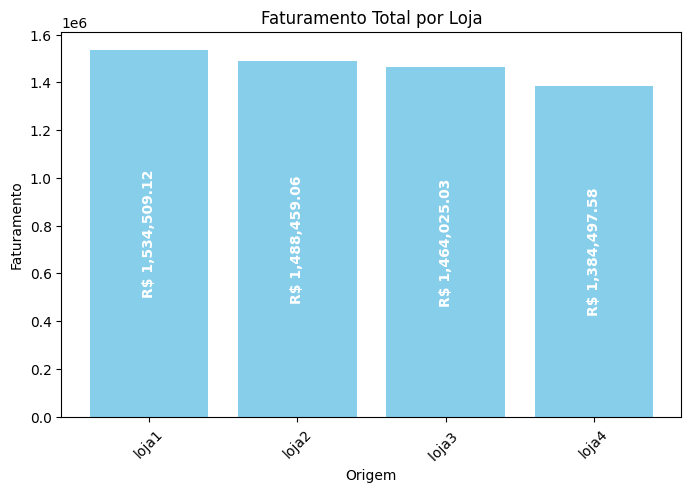

In [65]:
import matplotlib.pyplot as plt

# Criando o gráfico faturamento das lojas
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(faturamento_total_loja['origem'], faturamento_total_loja['Preço'], color='skyblue')

# Adicionando rótulos **rotacionados** dentro das barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height/2,  # Posicionando no meio
            f'R$ {height:,.2f}', ha='center', va='center', fontsize=10, color='white', fontweight='bold', rotation=90)

# Ajustando os labels
plt.xlabel('Origem')
plt.ylabel('Faturamento')
plt.title('Faturamento Total por Loja')
plt.xticks(rotation=45)  # Ajusta a rotação dos rótulos no eixo X para melhor leitura

plt.show()

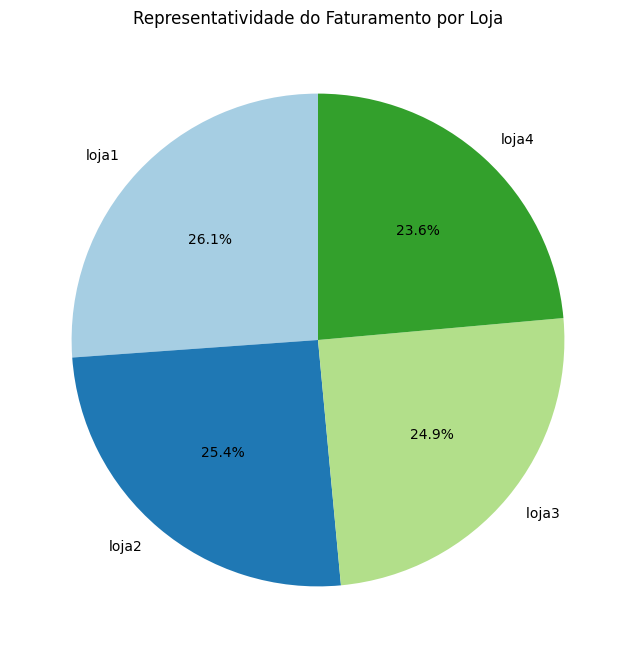

In [66]:
# Criando o gráfico de pizza
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(faturamento_total_loja['Preço'],
       labels=faturamento_total_loja['origem'],
       autopct='%1.1f%%',  # Exibe os percentuais diretamente no gráfico
       startangle=90,  # Começa o gráfico a partir de 90 graus para melhor distribuição
       colors=plt.cm.Paired.colors)  # Escolhe uma paleta de cores harmoniosa

# Adicionando título
plt.title('Representatividade do Faturamento por Loja')

# Exibindo o gráfico
plt.show()


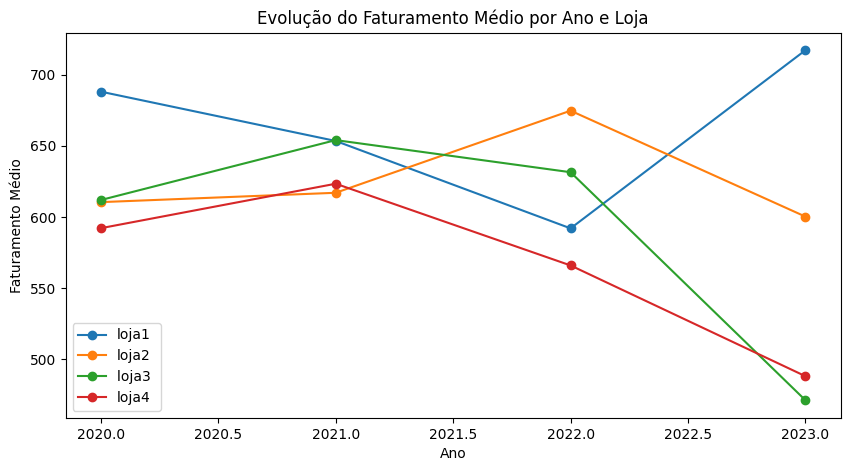

In [67]:
plt.figure(figsize=(10, 5))

# Criando um gráfico de linha para cada loja
for loja in faturamento_medio_por_ano['origem'].unique():
    dados_loja = faturamento_medio_por_ano[faturamento_medio_por_ano['origem'] == loja]
    plt.plot(dados_loja['Ano'], dados_loja['Preço'], marker='o', label=loja)

# Adicionando títulos e rótulos
plt.xlabel('Ano')
plt.ylabel('Faturamento Médio')
plt.title('Evolução do Faturamento Médio por Ano e Loja')
plt.legend()  # Adiciona legenda com nome das lojas

# Exibir o gráfico
plt.show()


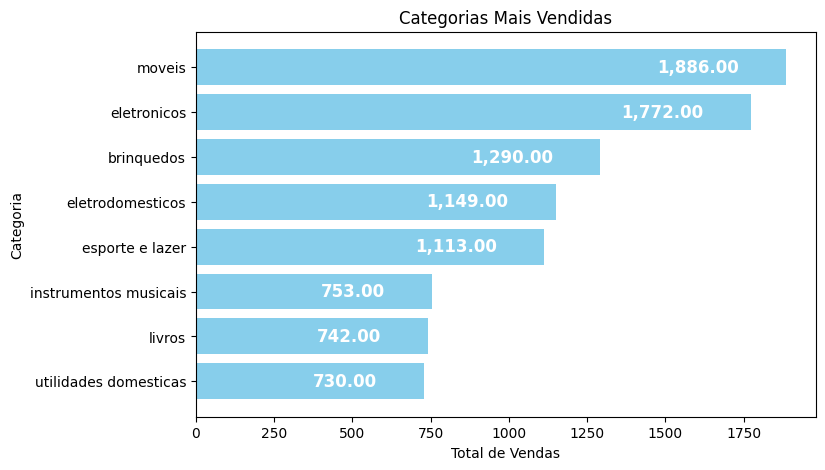

In [68]:
# Ordenando pelo número de vendas
qtd_vendas_categoria = qtd_vendas_categoria.sort_values(by='Quantidade de Vendas', ascending=True)

# Criando o gráfico de barras vertical
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(qtd_vendas_categoria['Categoria do Produto'], qtd_vendas_categoria['Quantidade de Vendas'], color='skyblue')

# Adicionando rótulos **dentro** das barras corretamente
for bar in bars:
    width = bar.get_width()
    ax.text(width - 150, bar.get_y() + bar.get_height()/2, f'{width:,.2f}',
            ha='right', va='center', fontsize=12, color= 'white', fontweight='bold')

# Ajustando os labels
plt.xlabel('Total de Vendas')
plt.ylabel('Categoria')
plt.title('Categorias Mais Vendidas')

plt.show()

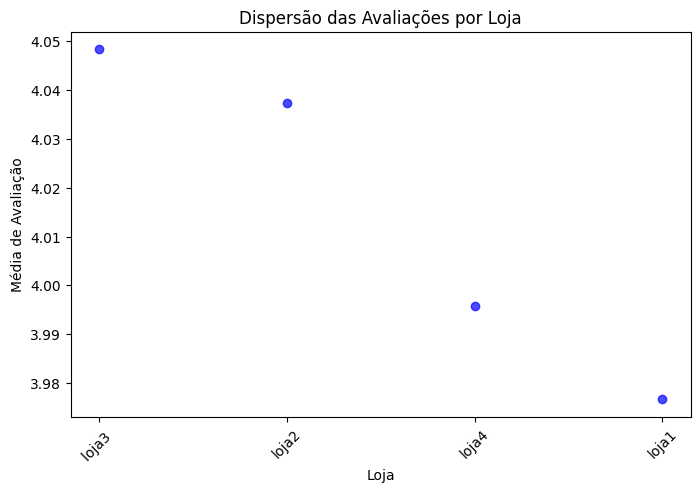

In [69]:
# Criando o gráfico de dispersão
plt.figure(figsize=(8, 5))
plt.scatter(media_avaliacao_lojas['origem'], media_avaliacao_lojas['Avaliação da compra'], color='blue', alpha=0.7)

# Adicionando títulos e rótulos
plt.xlabel('Loja')
plt.ylabel('Média de Avaliação')
plt.title('Dispersão das Avaliações por Loja')
plt.xticks(rotation=45)  # Para melhor leitura dos nomes das lojas

# Exibindo o gráfico
plt.show()


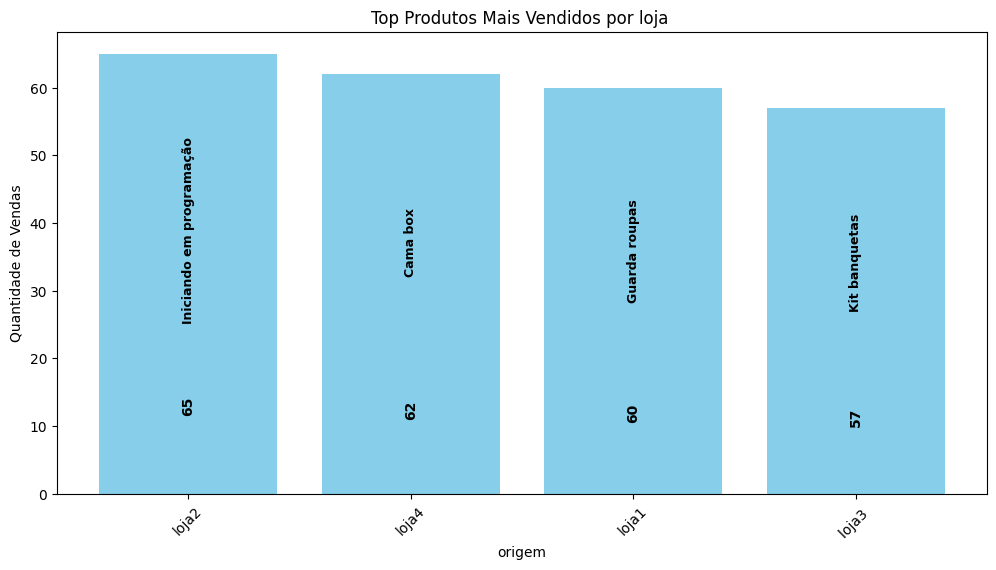

In [70]:
# Criando o gráfico

top_mais_vendidos = top_mais_vendidos.sort_values(by='Quantidade de Vendas', ascending=False)
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(top_mais_vendidos['origem'], top_mais_vendidos['Quantidade de Vendas'], color='skyblue')

# Adicionando rótulos **dentro das barras**
for bar, quantidade in zip(bars, top_mais_vendidos['Quantidade de Vendas']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height *0.2, f'{quantidade:,}', ha='center', va='center', fontsize=10, color='black', fontweight='bold', rotation = 90)

# Adicionando **os nomes dos produtos** abaixo da quantidade de vendas dentro das barras
for bar, produto in zip(bars, top_mais_vendidos['Produto']):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height * 0.6, produto,
            ha='center', va='center', fontsize=9, color='black', fontweight='bold', rotation = 90)

# Ajustando os labels
plt.xlabel('origem')
plt.ylabel('Quantidade de Vendas')
plt.title('Top Produtos Mais Vendidos por loja ')
plt.xticks(rotation=45)  # Rotaciona os rótulos para melhor leitura

plt.show()

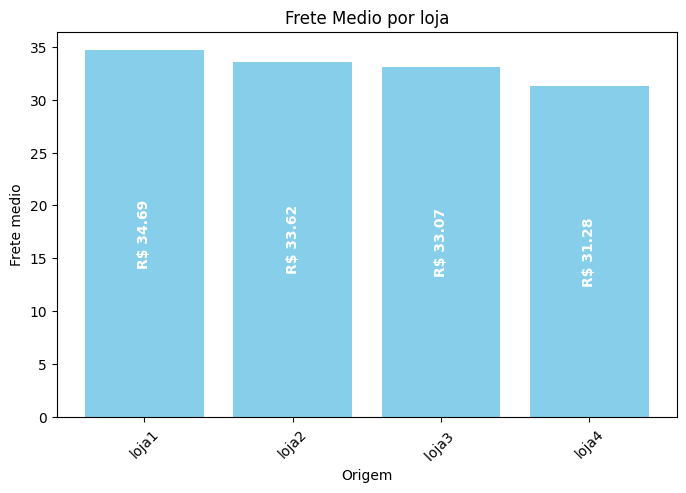

In [74]:
# Criando o gráfico faturamento das lojas
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(media_frete_lojas['origem'], media_frete_lojas['Frete'], color='skyblue')

# Adicionando rótulos **rotacionados** dentro das barras
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height/2,  # Posicionando no meio
            f'R$ {height:,.2f}', ha='center', va='center', fontsize=10, color='white', fontweight='bold', rotation=90)

# Ajustando os labels
plt.xlabel('Origem')
plt.ylabel('Frete medio')
plt.title('Frete Medio por loja')
plt.xticks(rotation=45)  # Ajusta a rotação dos rótulos no eixo X para melhor leitura

plt.show()

#**Relatório de Análise de Desempenho das Lojas – Recomendação de Venda**

##**Introdução:** O objetivo deste relatório é ajudar o Senhor João a decidir qual loja da sua rede AluraStore deve ser vendida para iniciar um novo empreendimento. Foram consideradas métricas quantitativas e qualitativas, incluindo faturamento total, categorias de produtos mais e menos vendidas, avaliação média dos clientes e o valor médio do frete.

##**Desenvolvimento:**


1.  **Faturamento Total** A Loja 1 apresentou o maior faturamento acumulado no período analisado, enquanto a Loja 4 demonstrou resultados inferiores, o que indica menor volume de vendas.

2.  **Categoria de Produtos** Todas as lojas compartilham padrões semelhantes nas categorias mais populares, como Moveis e Eletrônicos. No entanto, a Loja 4 teve a menor performance que pode impactar sua competitividade.

3.  **Avaliação Média dos Clientes** A média de avaliações das Lojas 1 e 4 foram (3.9), inferior as Lojas 2 e 3 (4.0), o que reforça a satisfação dos clientes e a fidelização nas Lojas 2 e 3.

4.  **Produtos Mais e Menos Vendidos** As Lojas 1 e 2 lideram nas vendas dos produtos com maior margem de lucro. Já a Loja 4 concentrou suas vendas em itens de menor valor, prejudicando sua performance financeira.

5.  **Frete Médio** A Loja 1 apresentou o maior custo médio de frete, porém não teve o impacto diretamente na conversão de vendas, pois mesmo com maior frete teve o maior faturamento liquido. A Loja 4 conseguiu equilibrar custo e logística com o menor frete médio entre as três.


#**Conclusão e Recomendação**

Com base nos dados analisados, recomenda-se que o Senhor João considere vender a Loja 4. Ela apresenta o menor faturamento, a segunda menor média de avaliação dos clientes, desempenho inferior nos produtos mais vendidos. Apesar de a Loja 1 ter desafios no custo de frete, seu desempenho geral é mais consistente que o da Loja 4. As Loja 2 e 3, por sua vez, demonstraram serem as mais sólidas em todos os aspectos e devem ser mantidas.


